/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:
Epoch 1/50-SGD Loss:0.948978
Epoch 2/50-SGD Loss:0.913940
Epoch 3/50-SGD Loss:0.904714
Epoch 4/50-SGD Loss:0.897096
Epoch 5/50-SGD Loss:0.890757
Epoch 6/50-SGD Loss:0.887691
Epoch 7/50-SGD Loss:0.883825
Epoch 8/50-SGD Loss:0.880021
Epoch 9/50-SGD Loss:0.878145
Epoch 10/50-SGD Loss:0.877562
Epoch 11/50-SGD Loss:0.873158
Epoch 12/50-SGD Loss:0.870726
Epoch 13/50-SGD Loss:0.870115
Epoch 14/50-SGD Loss:0.866867
Epoch 15/50-SGD Loss:0.863951
Epoch 16/50-SGD Loss:0.862185
Epoch 17/50-SGD Loss:0.858279
Epoch 18/50-SGD Loss:0.858054
Epoch 19/50-SGD Loss:0.857372
Epoch 20/50-SGD Loss:0.856008
Epoch 21/50-SGD Loss:0.852336
Epoch 22/50-SGD Loss:0.850075
Epoch 23/50-SGD Loss:0.849548
Epoch 24/50-SGD Loss:0.847910
Epoch 25/50-SGD Loss:0.845238
Epoch 26/50-SGD Loss:0.842721
Epoch 27/50-SGD Loss:0.840749
Epoch 28/50-SGD Loss:0.839448
Epoch 29/50-SGD Loss:0.837244
Epoch 30/50-SGD Loss:0.836270
Epoch 31/50-SGD Loss:0.834202
Epoch 32/50-SGD Loss:0.833349
Epoch 33/50-SGD Los

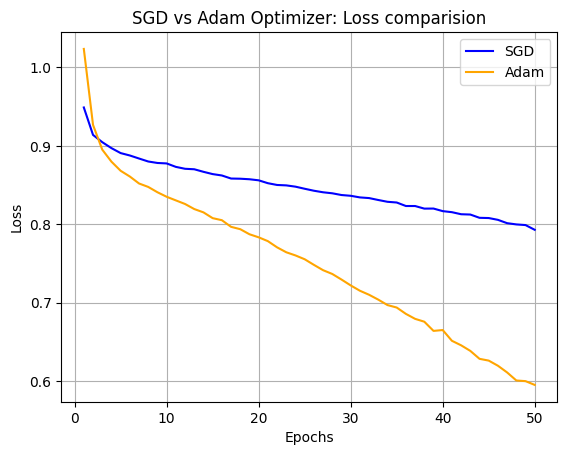

In [ ]:
#2 pgrm
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X=np.random.randn(1000,10)
    y=np.random.randn(1000,1)
    return X,y

def create_model():
  model = models.Sequential([
      layers.Dense(50,activation='relu',input_shape=(10,)),
      layers.Dense(20,activation='relu'),
      layers.Dense(1)
  ])
  return model

def train_model(model,optimizer,X,y,batch_size,epochs,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  history=[]

  for epoch in range(epochs):
    hist=model.fit(X,y,batch_size=batch_size,epochs=1,verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch+1}/{epochs}-{optimizer_name} Loss:{loss:4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()
optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.001)

epochs=50
batch_size=32

print("\nTraining with SGD Optimizer:")
sgd_loss=train_model(model_sgd,optimizer_sgd,X,y,batch_size,epochs,'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss=train_model(model_adam,optimizer_adam,X,y,batch_size,epochs,'Adam')
plt.plot(range(1,epochs+1),sgd_loss,label='SGD',color='blue')
plt.plot(range(1,epochs+1),adam_loss,label='Adam',color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss comparision')
plt.legend()
plt.grid(True)
plt.show()
